# Codecademy Biodiversity Project

Import modules

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

Load the dataset

In [4]:
species = pd.read_csv('species_info.csv')

Inspect dataframe

In [3]:
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


How many different species?

In [5]:
n_species = len(species)
print(n_species)

5824


What are the the unique categories?

In [6]:
categories = species.category.unique()
print(categories)

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


What are the different conservation statuses?

In [7]:
statuses = species.conservation_status.unique()
print(statuses)

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Count how many species fall under each conservation status

In [8]:
status_count = species.groupby('conservation_status').scientific_name.count().reset_index()
print(status_count)

  conservation_status  scientific_name
0          Endangered               16
1         In Recovery                4
2  Species of Concern              161
3          Threatened               10


Replace null values with 'No Intervention'

In [9]:
species.fillna('No Intervention', inplace=True)

Recount how many species fall under each conservation status w/ null as 'No Intervention'

In [10]:
status_count = species.groupby('conservation_status').scientific_name.count().reset_index()
print(status_count)

  conservation_status  scientific_name
0          Endangered               16
1         In Recovery                4
2     No Intervention             5633
3  Species of Concern              161
4          Threatened               10


Sort columns by how many species are in each conservation status

In [11]:
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')

Create bar chart for # of species per conservation status

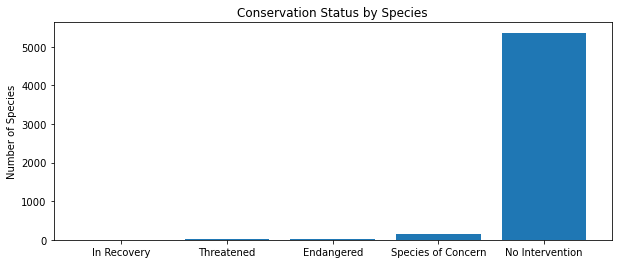

In [13]:
plt.figure(figsize = (10, 4))
ax = plt.subplot()
plt.bar(protection_counts.conservation_status, protection_counts.scientific_name)
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts.conservation_status)
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.show()

Are certain types of species more likely to be endangered?

Create a new column in 'species' called 'is_protected', which is 'True' if 'conservation_status' is not equal to 'No Intervention', and 'False' otherwise

In [15]:
species['is_protected'] = species.conservation_status.apply(lambda x: True if x != 'No Intervention' else False)

Group the 'species' data frame by the 'category' and 'is_protected' columns and count the unique species names in each grouping

In [16]:
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()

Examine dataframe

In [17]:
print(category_counts.head())

    category  is_protected  scientific_name
0  Amphibian         False               72
1  Amphibian          True                7
2       Bird         False              413
3       Bird          True               75
4       Fish         False              115


Using 'pivot' to rearange 'category_counts' so that:
- 'columns' are 'is_protected'
- 'index' is 'category'
- 'values' are 'scientific_name'

In [23]:
category_pivot = category_counts.pivot(index = 'category', columns = 'is_protected', values = 'scientific_name').reset_index()

Examine dataframe

In [24]:
print(category_pivot)

is_protected           category  False  True
0                     Amphibian     72     7
1                          Bird    413    75
2                          Fish    115    11
3                        Mammal    146    30
4             Nonvascular Plant    328     5
5                       Reptile     73     5
6                Vascular Plant   4216    46


Rename categories 'True' and 'False' to something more descriptive

In [26]:
category_pivot.columns = ['category', 'not_protected', 'protected']

Create a new column of 'category_pivot' called 'percent_protected with % of category that has some conservation status

In [27]:
category_pivot['percent_protected'] = category_pivot.protected / (category_pivot.protected + category_pivot.not_protected)

Examine dataframe

In [28]:
print(category_pivot)

            category  not_protected  protected  percent_protected
0          Amphibian             72          7           0.088608
1               Bird            413         75           0.153689
2               Fish            115         11           0.087302
3             Mammal            146         30           0.170455
4  Nonvascular Plant            328          5           0.015015
5            Reptile             73          5           0.064103
6     Vascular Plant           4216         46           0.010793


Are mammals are more likely to be endangered than birds?

Create a contingency table for chi-squared test

In [29]:
contingency = [[146, 30], [413, 75]]

Import chi squared test

In [30]:
from scipy.stats import chi2_contingency

Run 'chi2_contingency' with 'contingency'

In [33]:
x, pvalue, y, z = chi2_contingency(contingency)
print(pvalue)

0.6875948096661336


It looks like this difference isn't significant. p < 0.05 is false. Fail to reject null.

Are reptiles more likely to be endangered than mammals?
Create contingency table and run 'chi2_contingency' with it

In [34]:
contingency2 = [[73, 5], [146, 30]]
x, pvalue, y, z = chi2_contingency(contingency2)
print(pvalue)

0.03835559022969898


It looks like there is a significant difference. p < 0.05 is true. Reject null.

Load 'observations.csv' and view data

In [35]:
observations = pd.read_csv('observations.csv')
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


Create new column in 'species' called 'is_sheep' which is 'True' if the 'common_names' contains 'Sheep', and 'False' otherwise.

In [36]:
species['is_sheep'] = species.common_names.apply(lambda x: True if 'Sheep' in x else False)

Select rows of 'species' where 'is_sheep' is 'True' and examine data

In [37]:
sheep = species[species.is_sheep == True]
print(sheep.head())

            category     scientific_name  \
3             Mammal          Ovis aries   
1139  Vascular Plant    Rumex acetosella   
2233  Vascular Plant  Festuca filiformis   
3014          Mammal     Ovis canadensis   
3758  Vascular Plant    Rumex acetosella   

                                           common_names conservation_status  \
3     Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
1139                        Sheep Sorrel, Sheep Sorrell     No Intervention   
2233                              Fineleaf Sheep Fescue     No Intervention   
3014                       Bighorn Sheep, Bighorn Sheep  Species of Concern   
3758  Common Sheep Sorrel, Field Sorrel, Red Sorrel,...     No Intervention   

      is_protected  is_sheep  
3            False      True  
1139         False      True  
2233         False      True  
3014          True      True  
3758         False      True  


Select rows of 'species' where 'is_sheep' is 'True' and 'category' is 'Mammal' to exclude plants named after sheep

In [39]:
sheep_species = species[(species.is_sheep == True) & (species.category == 'Mammal')]
print(sheep.head())

     category          scientific_name  \
3      Mammal               Ovis aries   
3014   Mammal          Ovis canadensis   
4446   Mammal  Ovis canadensis sierrae   

                                           common_names conservation_status  \
3     Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
3014                       Bighorn Sheep, Bighorn Sheep  Species of Concern   
4446                        Sierra Nevada Bighorn Sheep          Endangered   

      is_protected  is_sheep  
3            False      True  
3014          True      True  
4446          True      True  


Merge 'sheep_species' with 'observations' to get dataframe with observations of sheep

In [41]:
sheep_observations = sheep_species.merge(observations)

Count total number of sheep observed in each park

In [43]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()
print(obs_by_park)

                             park_name  observations
0                  Bryce National Park           250
1  Great Smoky Mountains National Park           149
2            Yellowstone National Park           507
3               Yosemite National Park           282


Create bar chart showing the different number of observations per week at each park

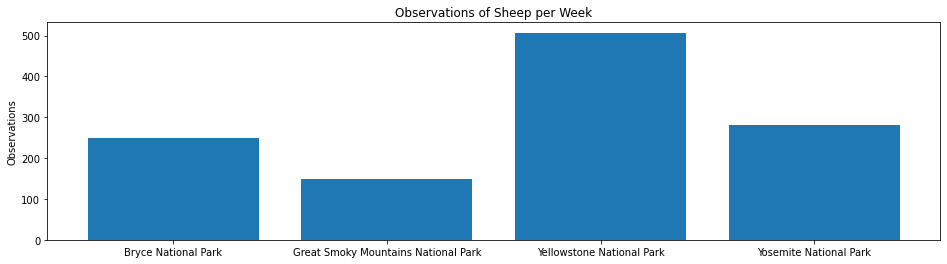

In [44]:
plt.figure(figsize = (16, 4))
ax = plt.subplot()
plt.bar(obs_by_park.park_name, obs_by_park.observations)
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park.park_name)
plt.ylabel('Observations')
plt.title('Observations of Sheep per Week')
plt.show()